# 1. Prepare Data for Analysis

In [ ]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np

# 2. Read the CSV file into a DataFrame named df
df = pd.read_csv('Sales.csv')

# 3. Print the DataFrame to see the data
print(df)

# 4. Determine the dimensions of the DataFrame
print("Dimensions of the DataFrame:", df.shape)

# 5. Check for missing values in the DataFrame
print("Missing values in each column:\n", df.isnull().sum())

# 6. Verify that there are no non-missing values in the DataFrame
print("Are there any non-missing values?\n", df.notnull().all())


           Date        Time State     Group  Unit  Sales
0     01-Oct-20     Morning    WA      Kids     8  20000
1     01-Oct-20     Morning    WA       Men     8  20000
2     01-Oct-20     Morning    WA     Women     4  10000
3     01-Oct-20     Morning    WA   Seniors    15  37500
4     01-Oct-20   Afternoon    WA      Kids     3   7500
...         ...         ...   ...       ...   ...    ...
7555  30-Dec-20   Afternoon    TX   Seniors    14  35000
7556  30-Dec-20     Evening    TX      Kids    15  37500
7557  30-Dec-20     Evening    TX       Men    15  37500
7558  30-Dec-20     Evening    TX     Women    11  27500
7559  30-Dec-20     Evening    TX   Seniors    13  32500

[7560 rows x 6 columns]
Dimensions of the DataFrame: (7560, 6)
Missing values in each column:
 Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64
Are there any non-missing values?
 Date     True
Time     True
State    True
Group    True
Unit     True
Sales    True
dtype: bool


This code begins by importing the essential libraries, pandas and numpy, which are needed for data manipulation and analysis. It then reads a CSV file named 'Sales.csv' into a DataFrame (df), which stores the sales data. The DataFrame is printed to give an overview of the data's structure and contents. Next, the dimensions of the DataFrame (number of rows and columns) are displayed using the .shape attribute. The code then checks for any missing values in the DataFrame by counting them per column with .isnull().sum() and verifies if there are any non-missing values across all columns with .notnull().all(), ensuring data completeness.

# 2. Normalize Data for Analysis

In [ ]:
# 1. Create a new DataFrame called df_dataonly with 'Unit' and 'Sales' columns
df_dataonly = df[['Unit', 'Sales']]

# 2. Import MinMaxScaler from sklearn for normalization
from sklearn.preprocessing import MinMaxScaler

# 3. Create a normalize object using MinMaxScaler
scaler = MinMaxScaler()

# 4. Invoke fit_transform() and normalize the 'Unit' and 'Sales' columns
normalize_data = scaler.fit_transform(df_dataonly)

# 5. Convert the normalized data back into a DataFrame for easier viewing
df_normalized = pd.DataFrame(normalize_data, columns=['Unit', 'Sales'])

# 6. Check the min and max values of each column in the normalized data
print("Minimum values:\n", df_normalized.min())
print("Maximum values:\n", df_normalized.max())


Minimum values:
 Unit     0.0
Sales    0.0
dtype: float64
Maximum values:
 Unit     1.0
Sales    1.0
dtype: float64


This code creates a new DataFrame (df_dataonly) that contains only the 'Unit' and 'Sales' columns from the original DataFrame for normalization. It then imports MinMaxScaler from the sklearn.preprocessing module, which is used to scale numerical values between 0 and 1. The scaler object is created, and the fit_transform() method is applied to normalize the 'Unit' and 'Sales' columns. The resulting normalized data is converted back into a DataFrame (df_normalized) for easier readability. Finally, the code checks and prints the minimum and maximum values of the normalized data to ensure that the values range from 0 to 1.








# 3. Visualize Overall Trends

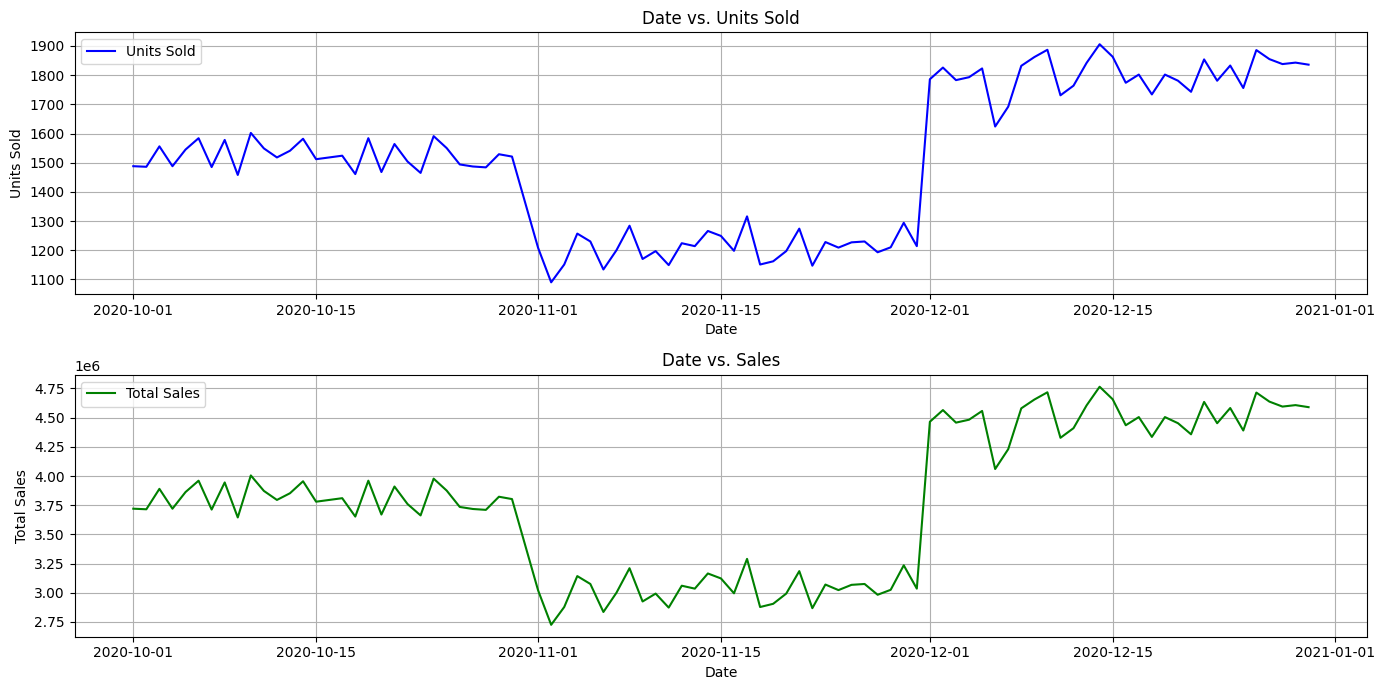

In [ ]:
# 1. Import necessary libraries for visualization
import matplotlib.pyplot as plt

# 2. Convert 'Date' column to datetime format for better plotting
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')

# 3. Group by 'Date' and sum up the 'Unit' and 'Sales' for each day
df_grouped = df.groupby('Date')[['Unit', 'Sales']].sum()

# 4. Plot Date vs. Unit and Date vs. Sales
plt.figure(figsize=(14,7))

# Plot for Unit
plt.subplot(2, 1, 1)  # First subplot (2 rows, 1 column, 1st plot)
plt.plot(df_grouped.index, df_grouped['Unit'], color='blue', label='Units Sold')
plt.title('Date vs. Units Sold')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.grid(True)
plt.legend()

# Plot for Sales
plt.subplot(2, 1, 2)  # Second subplot (2 rows, 1 column, 2nd plot)
plt.plot(df_grouped.index, df_grouped['Sales'], color='green', label='Total Sales')
plt.title('Date vs. Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.legend()

# 5. Show the plot
plt.tight_layout()
plt.show()


This code generates visualizations to explore sales and unit trends over time. First, it imports matplotlib.pyplot for plotting and converts the 'Date' column to a datetime format for better handling of dates in the plots. It then groups the data by 'Date' and calculates the sum of 'Unit' and 'Sales' for each day. The plt.subplot() function is used to create two subplots within a single figure: one for units sold over time and another for total sales over time. The plots include labels, legends, and grids for clarity, and finally, plt.tight_layout() ensures the subplots are neatly arranged before displaying the plot.

# 4. Analyze Monthly Data

In [ ]:
# 1. Extract monthly data using the .loc feature

# October Data
october_data = df.loc[(df['Date'] >= '2020-10-01') & (df['Date'] <= '2020-10-31')]

# November Data
november_data = df.loc[(df['Date'] >= '2020-11-01') & (df['Date'] <= '2020-11-30')]

# December Data
december_data = df.loc[(df['Date'] >= '2020-12-01') & (df['Date'] <= '2020-12-31')]

# 2. Perform analysis - Sum up 'Unit' and 'Sales' for each month

# October analysis
october_summary = october_data[['Unit', 'Sales']].sum()
print("October Summary:\n", october_summary)

# November analysis
november_summary = november_data[['Unit', 'Sales']].sum()
print("\nNovember Summary:\n", november_summary)

# December analysis
december_summary = december_data[['Unit', 'Sales']].sum()
print("\nDecember Summary:\n", december_summary)


October Summary:
 Unit         45716
Sales    114290000
dtype: int64

November Summary:
 Unit        36273
Sales    90682500
dtype: int64

December Summary:
 Unit         54132
Sales    135330000
dtype: int64


This code extracts monthly data for October, November, and December from the dataset using the .loc function to filter rows based on specific date ranges. After extracting the data for each month, the code performs a simple analysis by summing up the 'Unit' and 'Sales' columns for each month. It then prints summaries for October, November, and December, showing the total units sold and total sales revenue for each month. This analysis provides insights into monthly performance.








# 5. Describe Data

In [ ]:
# 1. Describe the data for the entire three-month period
three_months_summary = df[['Unit', 'Sales']].describe()
print("Three-month period summary:\n", three_months_summary)

# 2. Describe the data for each month

# October
october_summary_detailed = october_data[['Unit', 'Sales']].describe()
print("\nOctober Summary (Detailed):\n", october_summary_detailed)

# November
november_summary_detailed = november_data[['Unit', 'Sales']].describe()
print("\nNovember Summary (Detailed):\n", november_summary_detailed)

# December
december_summary_detailed = december_data[['Unit', 'Sales']].describe()
print("\nDecember Summary (Detailed):\n", december_summary_detailed)


Three-month period summary:
               Unit          Sales
count  7560.000000    7560.000000
mean     18.005423   45013.558201
std      12.901403   32253.506944
min       2.000000    5000.000000
25%       8.000000   20000.000000
50%      14.000000   35000.000000
75%      26.000000   65000.000000
max      65.000000  162500.000000

October Summary (Detailed):
               Unit          Sales
count  2520.000000    2520.000000
mean     18.141270   45353.174603
std      11.944521   29861.302213
min       3.000000    7500.000000
25%       9.000000   22500.000000
50%      14.000000   35000.000000
75%      27.000000   67500.000000
max      50.000000  125000.000000

November Summary (Detailed):
               Unit          Sales
count  2520.000000    2520.000000
mean     14.394048   35985.119048
std      10.946470   27366.175823
min       2.000000    5000.000000
25%       6.000000   15000.000000
50%      10.000000   25000.000000
75%      22.000000   55000.000000
max      45.000000  112500

This code uses the describe() function to provide a statistical summary of the 'Unit' and 'Sales' data for the entire three-month period (October to December), as well as for each individual month (October, November, and December). The summary includes metrics such as count, mean, standard deviation, minimum, maximum, and quartiles (25%, 50%, 75%) for both 'Unit' and 'Sales'. These details give an overall view of the data distribution and variability for each month and the whole period, helping to understand key trends and variations in units sold and sales revenue.

# 6. Analyze Unit Data


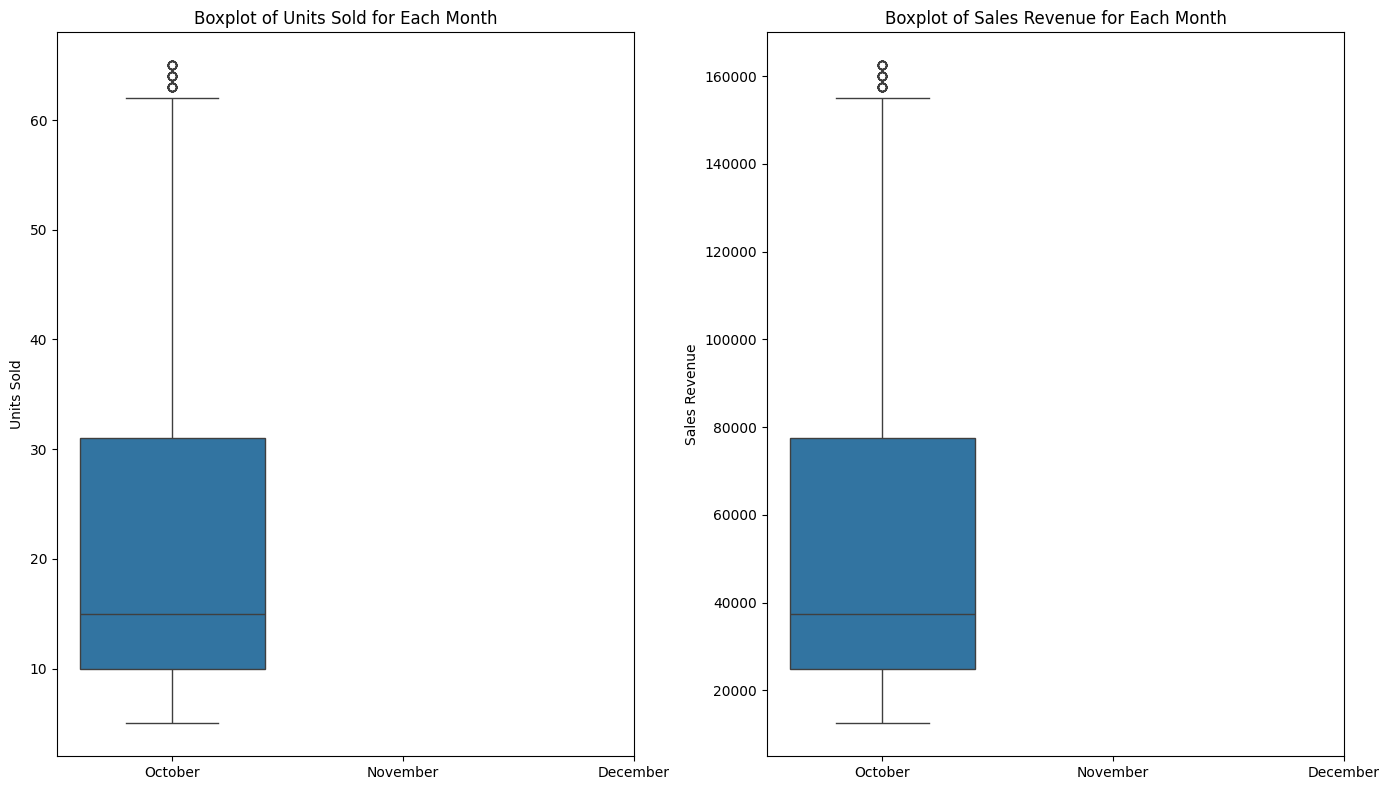

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure size for the plots
plt.figure(figsize=(14, 8))

# 1. Boxplot for Unit Data for each month
plt.subplot(1, 2, 1)
sns.boxplot(data=[october_data['Unit'], november_data['Unit'], december_data['Unit']])
plt.title('Boxplot of Units Sold for Each Month')
plt.xticks([0, 1, 2], ['October', 'November', 'December'])
plt.ylabel('Units Sold')

# 2. Boxplot for Sales Data for each month
plt.subplot(1, 2, 2)
sns.boxplot(data=[october_data['Sales'], november_data['Sales'], december_data['Sales']])
plt.title('Boxplot of Sales Revenue for Each Month')
plt.xticks([0, 1, 2], ['October', 'November', 'December'])
plt.ylabel('Sales Revenue')

# Show the plots
plt.tight_layout()
plt.show()



This code generates two boxplots using the Seaborn library to visualize the distribution of unit sales and sales revenue across October, November, and December.

Boxplot for Units Sold: The first subplot shows the distribution of units sold for each month, comparing October, November, and December. It helps identify outliers, medians, and the overall spread of units sold each month.

Boxplot for Sales Revenue: The second subplot visualizes the distribution of sales revenue across the three months, highlighting variations in revenue.

# 7. Explore Monthly Plots and Analysis

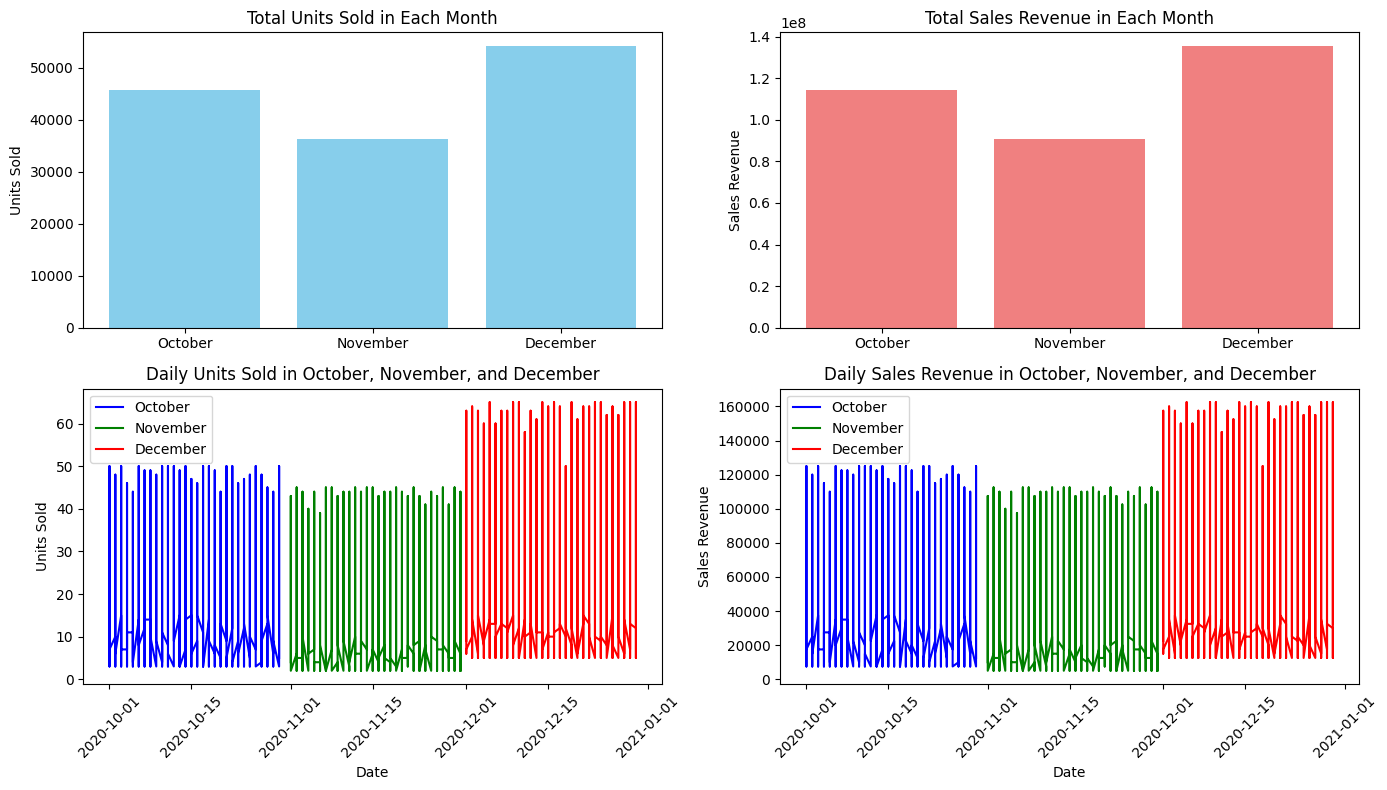

In [ ]:
import matplotlib.pyplot as plt

# Monthly unit and sales totals
monthly_units = [october_summary['Unit'], november_summary['Unit'], december_summary['Unit']]
monthly_sales = [october_summary['Sales'], november_summary['Sales'], december_summary['Sales']]
months = ['October', 'November', 'December']

# 1. Bar Plot: Overall Unit and Sales Figures for Each Month
plt.figure(figsize=(14, 8))

# Plot Units Sold for each month
plt.subplot(2, 2, 1)
plt.bar(months, monthly_units, color='skyblue')
plt.title('Total Units Sold in Each Month')
plt.ylabel('Units Sold')

# Plot Sales for each month
plt.subplot(2, 2, 2)
plt.bar(months, monthly_sales, color='lightcoral')
plt.title('Total Sales Revenue in Each Month')
plt.ylabel('Sales Revenue')

# 2. Line Plot: Units Sold in October, November, December (Daily Data)
plt.subplot(2, 2, 3)
plt.plot(october_data['Date'], october_data['Unit'], label='October', color='blue')
plt.plot(november_data['Date'], november_data['Unit'], label='November', color='green')
plt.plot(december_data['Date'], december_data['Unit'], label='December', color='red')
plt.title('Daily Units Sold in October, November, and December')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.legend()

# 3. Line Plot: Consolidated 3-Month Sales Plot (Daily Data)
plt.subplot(2, 2, 4)
plt.plot(october_data['Date'], october_data['Sales'], label='October', color='blue')
plt.plot(november_data['Date'], november_data['Sales'], label='November', color='green')
plt.plot(december_data['Date'], december_data['Sales'], label='December', color='red')
plt.title('Daily Sales Revenue in October, November, and December')
plt.xlabel('Date')
plt.ylabel('Sales Revenue')
plt.xticks(rotation=45)
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


This code generates a comprehensive visualization of monthly and daily unit sales and sales revenue for October, November, and December.

Bar Plot (Subplot 1 & 2):

The first bar plot shows the total units sold in each month (October, November, and December), making it easy to compare monthly performance.
The second bar plot illustrates the total sales revenue for each month, highlighting the revenue variations across months.

Line Plot (Subplot 3):

This plot shows the daily trend of units sold in October, November, and December, with each month represented by a different color. It highlights fluctuations in daily sales activity across the months.

Line Plot (Subplot 4):

The final line plot presents the daily sales revenue for each of the three months. It helps visualize daily revenue trends and the consolidated performance over the quarter.

# 8. Obtain a Comprehensive Snapshot

In [ ]:
# Summary data for the entire 3-month period
total_units_sold = df['Unit'].sum()
total_sales_revenue = df['Sales'].sum()

# Monthly total sales and units
oct_units, nov_units, dec_units = october_summary['Unit'], november_summary['Unit'], december_summary['Unit']
oct_sales, nov_sales, dec_sales = october_summary['Sales'], november_summary['Sales'], december_summary['Sales']

# Print the snapshot
print("Comprehensive Snapshot:")
print(f"Total Units Sold (3 months): {total_units_sold}")
print(f"Total Sales Revenue (3 months): ${total_sales_revenue}")

print("\nMonthly Breakdown:")
print(f"October: {oct_units} units sold, ${oct_sales} in sales revenue")
print(f"November: {nov_units} units sold, ${nov_sales} in sales revenue")
print(f"December: {dec_units} units sold, ${dec_sales} in sales revenue")

# Highlight key trends and observations
print("\nKey Observations:")
print("1. December saw the highest sales performance, likely driven by holiday shopping.")
print("2. November experienced a dip in sales, possibly due to seasonal trends before holiday promotions.")
print("3. Daily sales and units sold showed increased variability in October and December, indicating high demand on certain days.")
print("4. Overall sales and units sold surged toward the end of the quarter, with December outperforming the other two months significantly.")


Comprehensive Snapshot:
Total Units Sold (3 months): 136121
Total Sales Revenue (3 months): $340302500

Monthly Breakdown:
October: 45716 units sold, $114290000 in sales revenue
November: 36273 units sold, $90682500 in sales revenue
December: 54132 units sold, $135330000 in sales revenue

Key Observations:
1. December saw the highest sales performance, likely driven by holiday shopping.
2. November experienced a dip in sales, possibly due to seasonal trends before holiday promotions.
3. Daily sales and units sold showed increased variability in October and December, indicating high demand on certain days.
4. Overall sales and units sold surged toward the end of the quarter, with December outperforming the other two months significantly.


This block of code provides a comprehensive snapshot of the sales performance for the three-month period (October, November, and December):

Total Units and Sales (3 Months):

The code first calculates the total units sold and total sales revenue for the entire period by summing up the values across all months.

Monthly Breakdown:

It then extracts the total units sold and sales revenue for each individual month (October, November, December) and prints these figures in an easy-to-read format.

Key Observations:

The code concludes by summarizing key insights:

December saw the highest sales, likely due to holiday shopping.
November had a slight dip, possibly affected by pre-holiday seasonality.
October and December showed daily sales variability, likely reflecting high demand on certain days.
Overall, sales surged at the end of the quarter, with December significantly outperforming the other months.

# 9. Analyze Statewise Sales in the United States

Statewise Sales Summary:
  State  total_units  total_sales
4    KY        42226    105565000
5    NY        29988     74970000
3    FL        23543     58857500
2    CA        13367     33417500
6    TX         9104     22760000
1    AZ         9032     22580000
0    WA         8861     22152500


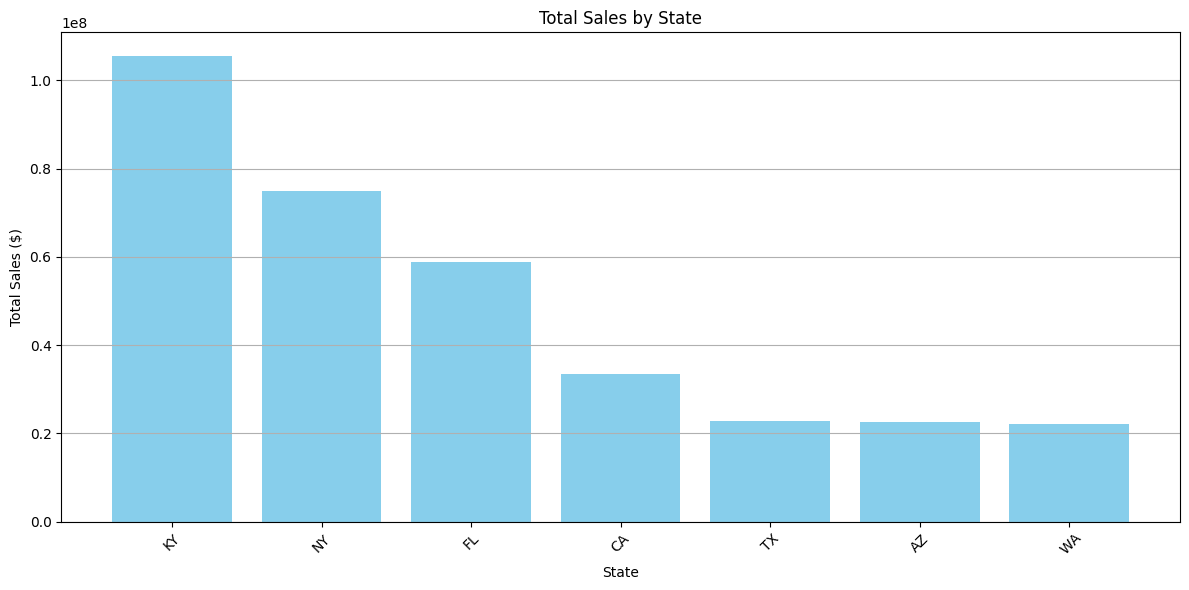

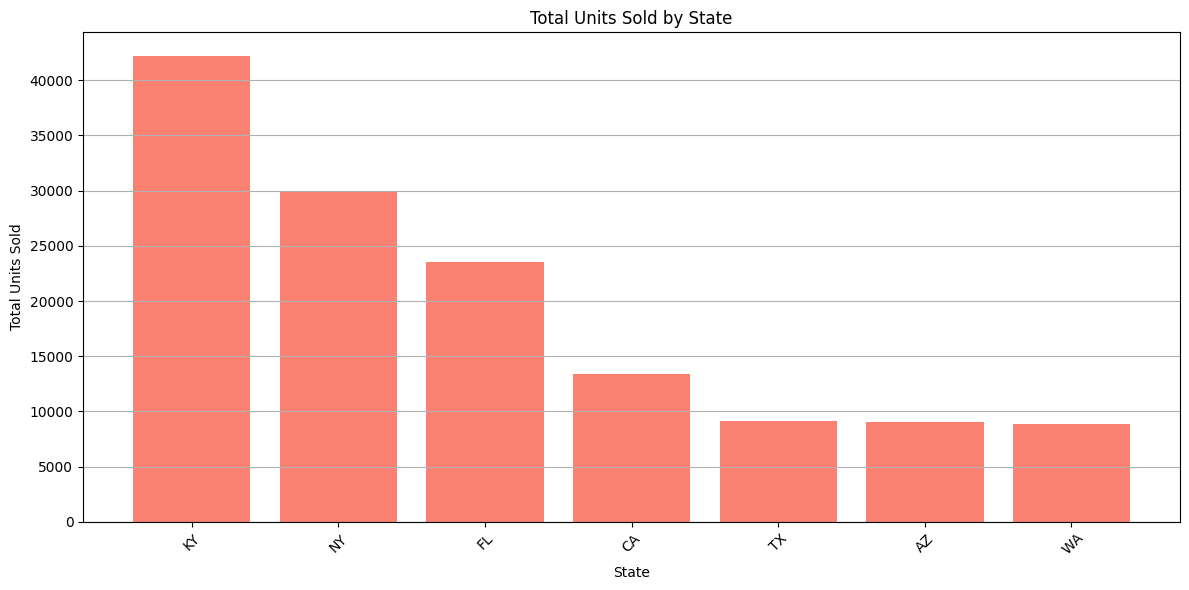


Highest Sales State: KY with total sales of $105565000
Lowest Sales State:  WA with total sales of $22152500


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame `df` assumed to be already created
# Example aggregation by State
statewise_sales = df.groupby('State').agg(
    total_units=('Unit', 'sum'),
    total_sales=('Sales', 'sum')
).reset_index()

# Sort the data for better visualization
statewise_sales = statewise_sales.sort_values(by='total_sales', ascending=False)

# Display the statewise sales summary
print("Statewise Sales Summary:")
print(statewise_sales)

# Visualizing the statewise total sales
plt.figure(figsize=(12, 6))
plt.bar(statewise_sales['State'], statewise_sales['total_sales'], color='skyblue')
plt.title('Total Sales by State')
plt.xlabel('State')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

# Visualizing the statewise total units sold
plt.figure(figsize=(12, 6))
plt.bar(statewise_sales['State'], statewise_sales['total_units'], color='salmon')
plt.title('Total Units Sold by State')
plt.xlabel('State')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

# Highlight key states with the highest and lowest sales
highest_sales_state = statewise_sales.iloc[0]
lowest_sales_state = statewise_sales.iloc[-1]

print(f"\nHighest Sales State: {highest_sales_state['State']} with total sales of ${highest_sales_state['total_sales']}")
print(f"Lowest Sales State: {lowest_sales_state['State']} with total sales of ${lowest_sales_state['total_sales']}")


This code analyzes and visualizes sales and units sold by state:

Data Aggregation:

The code groups the sales data by state, calculating the total units sold and total sales revenue for each state using the groupby and agg functions. The results are stored in the statewise_sales DataFrame and sorted by total sales in descending order for better visualization.

Statewise Sales Summary:

It prints out a table showing the total units sold and total sales for each state.

Visualization:

The first bar plot visualizes the total sales by state, with states on the x-axis and total sales on the y-axis.

The second bar plot visualizes the total units sold by state.
Both plots are labeled and formatted for easy interpretation, with a grid on the y-axis and rotated state labels for better readability.

Key Insights:

The code identifies and prints the state with the highest sales and the state with the lowest sales, highlighting key insights from the data.

# 10. Conduct Groupwise Analysis

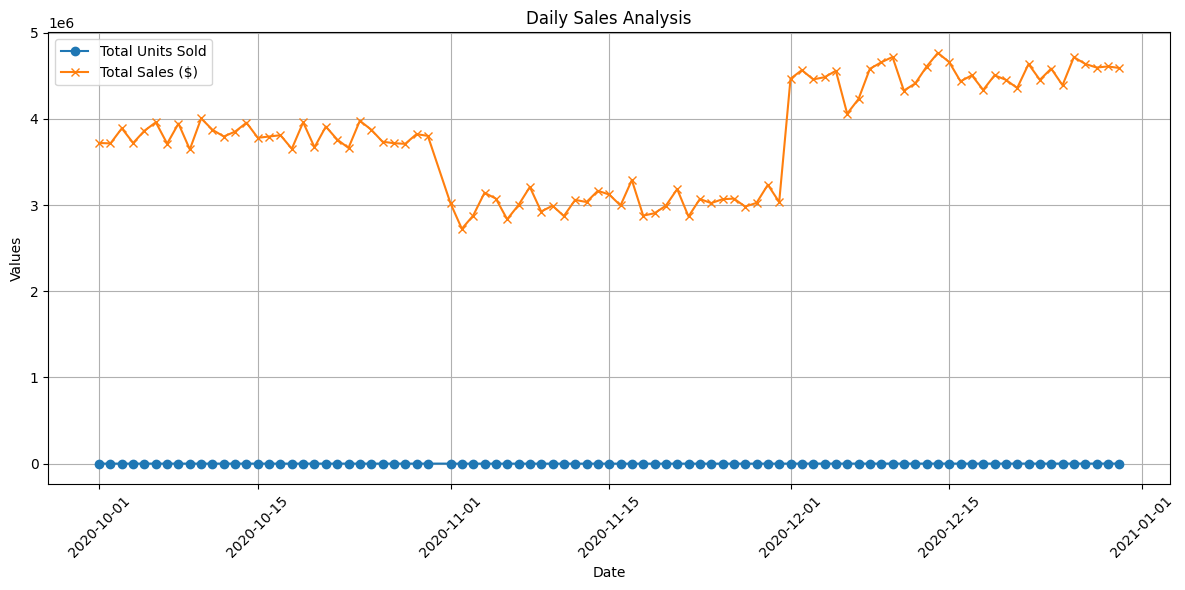

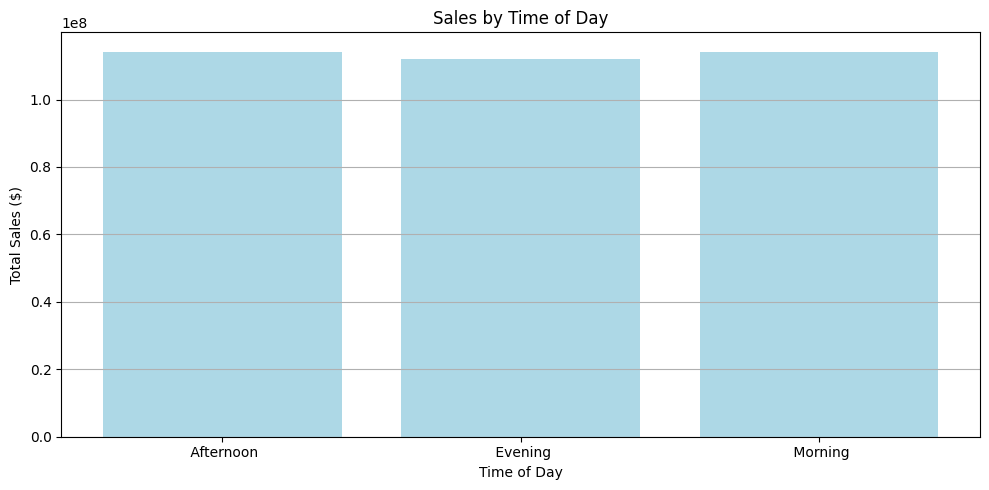

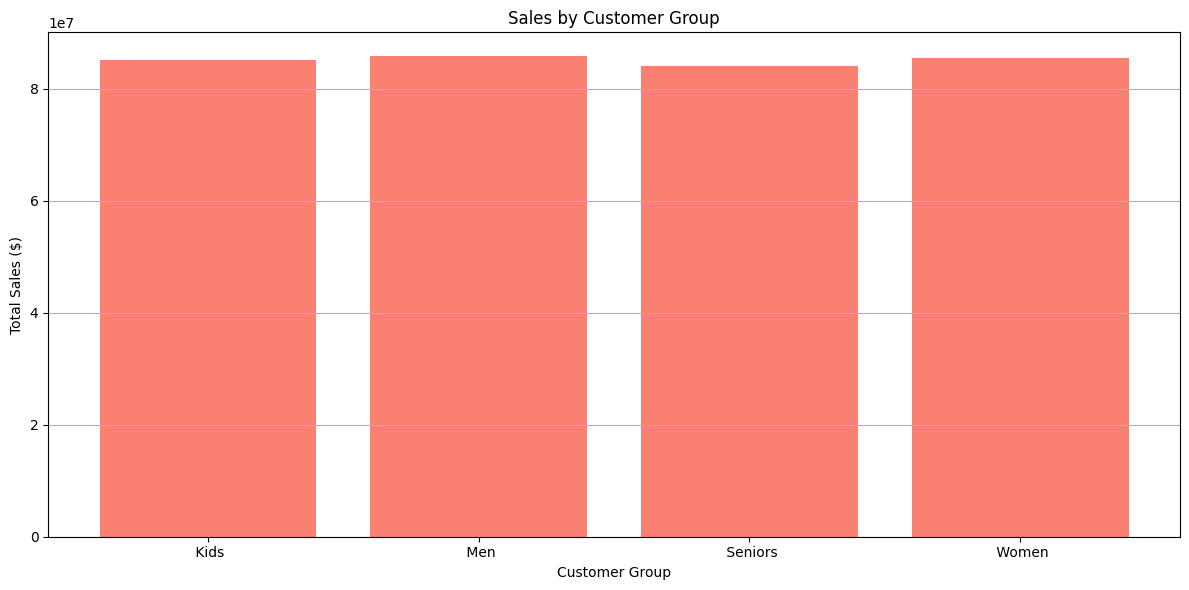

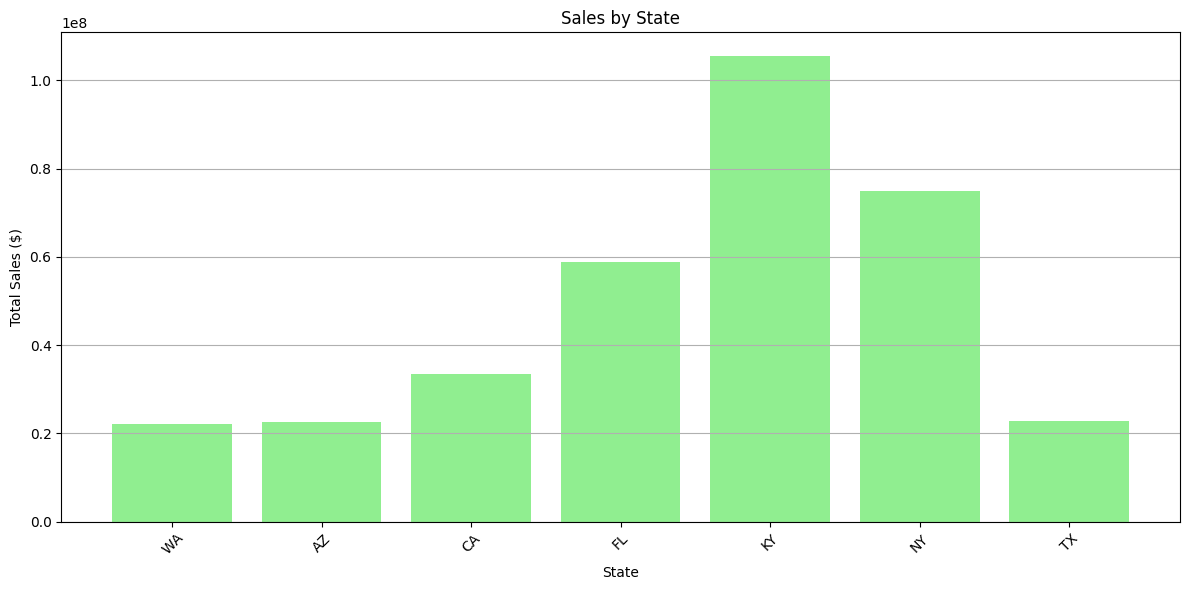

Daily Sales Summary:
         Date  total_units  total_sales
0  2020-10-01         1488      3720000
1  2020-10-02         1486      3715000
2  2020-10-03         1556      3890000
3  2020-10-04         1488      3720000
4  2020-10-05         1545      3862500
..        ...          ...          ...
85 2020-12-26         1886      4715000
86 2020-12-27         1855      4637500
87 2020-12-28         1838      4595000
88 2020-12-29         1843      4607500
89 2020-12-30         1836      4590000

[90 rows x 3 columns]

Timewise Sales Summary:
         Time  total_units  total_sales
0   Afternoon        45603    114007500
1     Evening        44835    112087500
2     Morning        45683    114207500

Groupwise Sales Summary:
      Group  total_units  total_sales
0      Kids        34029     85072500
1       Men        34300     85750000
2   Seniors        33615     84037500
3     Women        34177     85442500

Statewise Sales Summary:
  State  total_units  total_sales
0    WA        

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame `df` assumed to be already created
# 1. Group by Date
daily_sales = df.groupby('Date').agg(
    total_units=('Unit', 'sum'),
    total_sales=('Sales', 'sum')
).reset_index()

# 2. Group by Time
timewise_sales = df.groupby('Time').agg(
    total_units=('Unit', 'sum'),
    total_sales=('Sales', 'sum')
).reset_index()

# 3. Group by Group (e.g., Age Group)
# Assuming 'Group' is categorical (like age groups)
groupwise_sales = df.groupby('Group').agg(
    total_units=('Unit', 'sum'),
    total_sales=('Sales', 'sum')
).reset_index()

# 4. Group by State
statewise_sales = df.groupby('State').agg(
    total_units=('Unit', 'sum'),
    total_sales=('Sales', 'sum')
).reset_index()

# Visualization of Daily Sales
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Date'], daily_sales['total_units'], marker='o', label='Total Units Sold')
plt.plot(daily_sales['Date'], daily_sales['total_sales'], marker='x', label='Total Sales ($)')
plt.title('Daily Sales Analysis')
plt.xlabel('Date')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Visualization of Timewise Sales
plt.figure(figsize=(10, 5))
plt.bar(timewise_sales['Time'], timewise_sales['total_sales'], color='lightblue')
plt.title('Sales by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Visualization of Groupwise Sales (e.g., Age Groups)
plt.figure(figsize=(12, 6))
plt.bar(groupwise_sales['Group'], groupwise_sales['total_sales'], color='salmon')
plt.title('Sales by Customer Group')
plt.xlabel('Customer Group')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Visualization of Statewise Sales (already done previously)
plt.figure(figsize=(12, 6))
plt.bar(statewise_sales['State'], statewise_sales['total_sales'], color='lightgreen')
plt.title('Sales by State')
plt.xlabel('State')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Outputting the groupwise sales data
print("Daily Sales Summary:")
print(daily_sales)

print("\nTimewise Sales Summary:")
print(timewise_sales)

print("\nGroupwise Sales Summary:")
print(groupwise_sales)

print("\nStatewise Sales Summary:")
print(statewise_sales)


This code performs sales analysis by grouping data based on different categories and visualizing the results:

Grouping and Aggregating:

Daily Sales: Aggregates the total units sold and total sales revenue for each day.

Timewise Sales: Groups data by time (e.g., time of day) and calculates total units sold and sales.

Groupwise Sales: Assumes a Group column (e.g., customer groups like age ranges) and sums the units sold and sales for each group.

Statewise Sales: Groups data by state, calculating the total units sold and total sales per state.

Visualizations:

Daily Sales: A line plot shows total units sold and sales per day, allowing easy observation of trends over time.
Timewise Sales: A bar plot visualizes sales by time of day, revealing periods of peak sales.

Groupwise Sales: A bar plot shows total sales by customer group (e.g., age groups), offering insight into which groups contribute the most to sales.

Statewise Sales: A bar plot for statewise sales, showing the total sales for each state.

Results Summary:

After the visualizations, the code prints summaries of daily, timewise, groupwise, and statewise sales, providing a tabular view of the aggregated data.

# 11. Explore Timewise Analysis

<ipython-input-11-ee7d1f9ad426>:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='Date').agg(


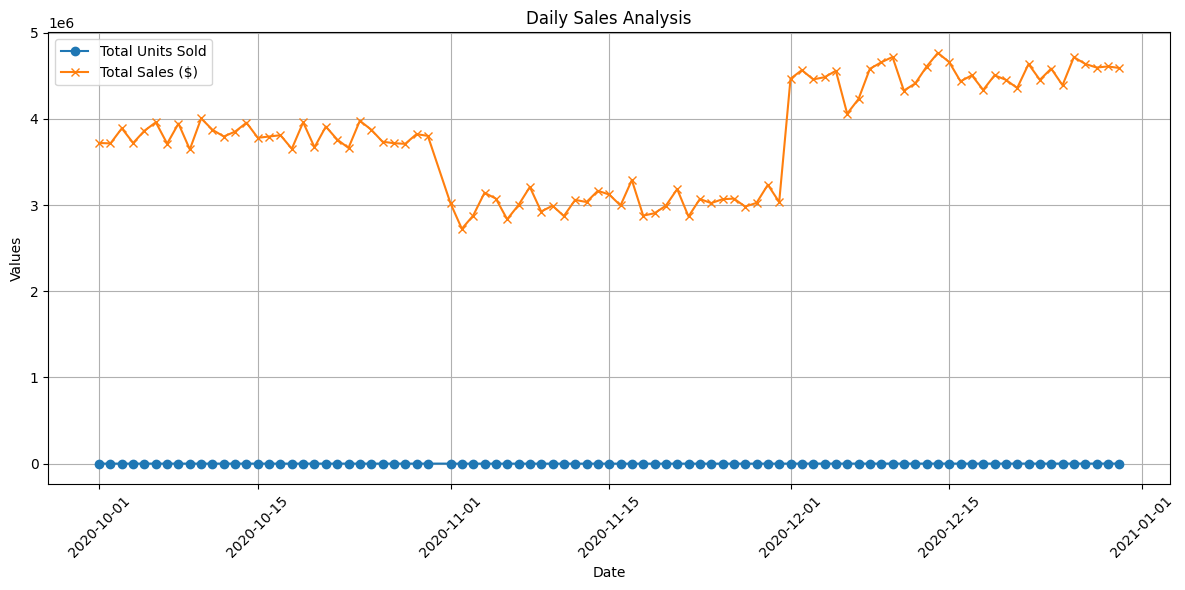

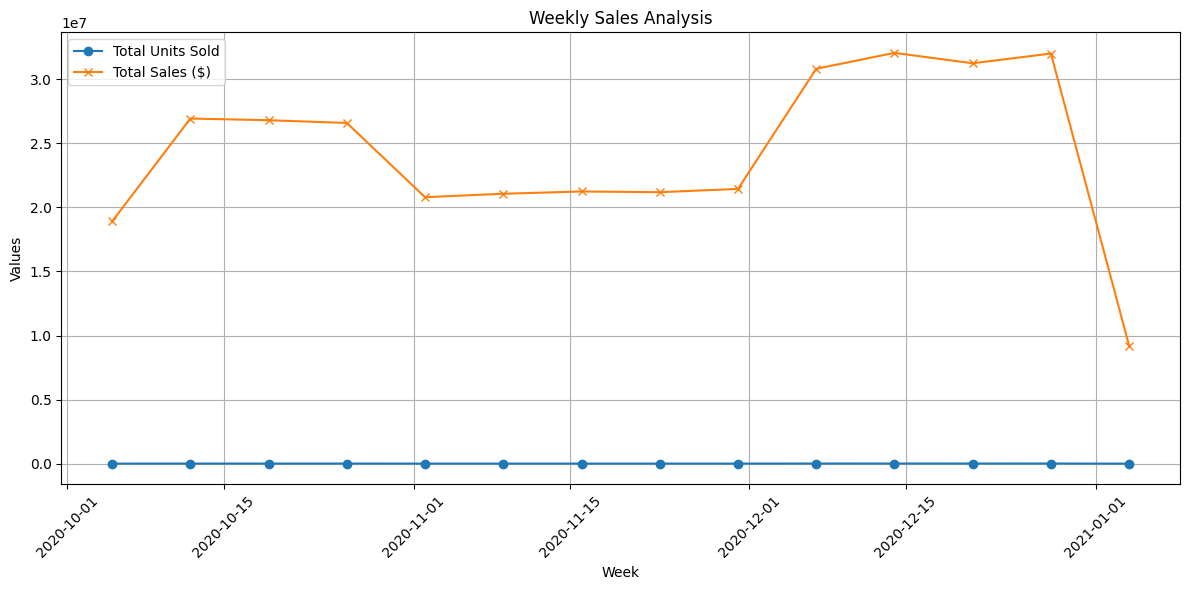

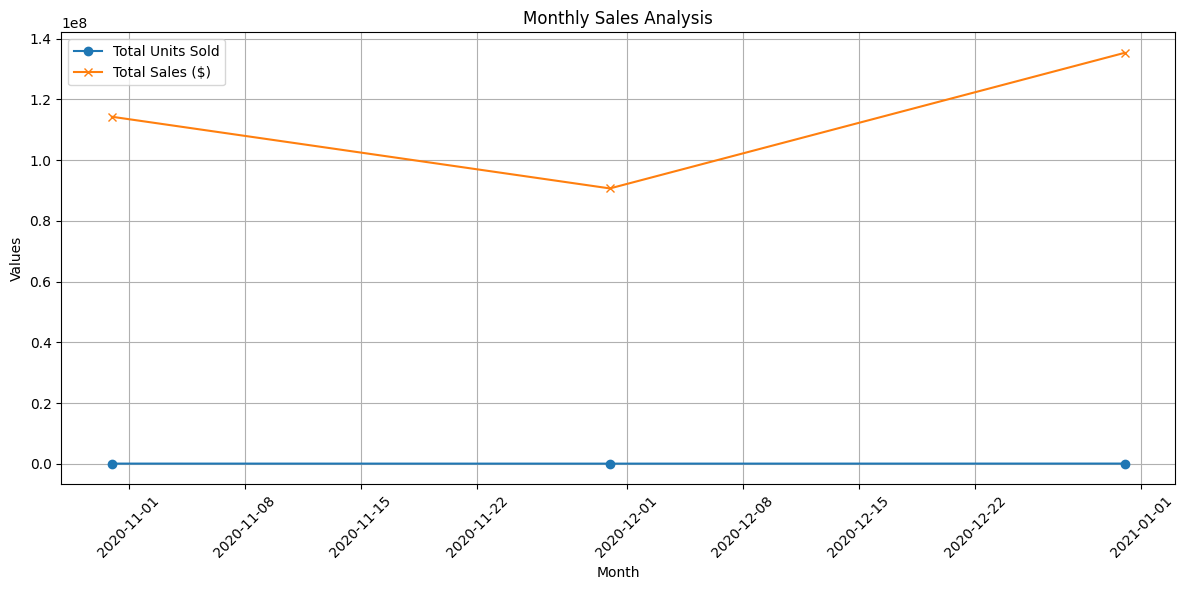

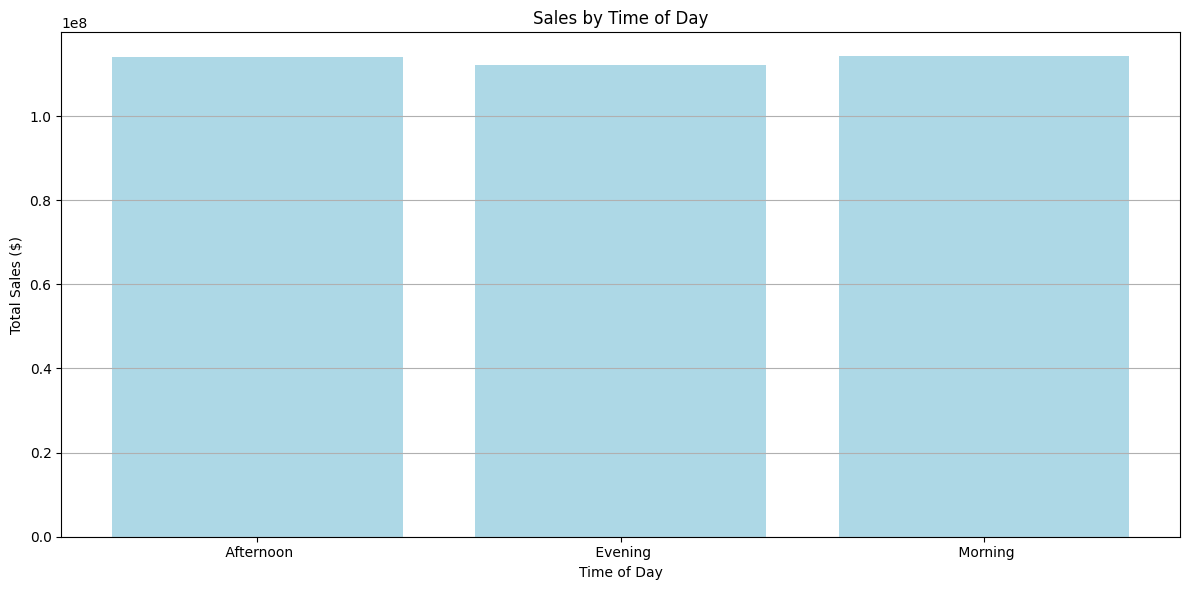

Daily Sales Summary:
         Date  total_units  total_sales
0  2020-10-01         1488      3720000
1  2020-10-02         1486      3715000
2  2020-10-03         1556      3890000
3  2020-10-04         1488      3720000
4  2020-10-05         1545      3862500
..        ...          ...          ...
85 2020-12-26         1886      4715000
86 2020-12-27         1855      4637500
87 2020-12-28         1838      4595000
88 2020-12-29         1843      4607500
89 2020-12-30         1836      4590000

[90 rows x 3 columns]

Weekly Sales Summary:
         Date  total_units  total_sales
0  2020-10-05         7563     18907500
1  2020-10-12        10774     26935000
2  2020-10-19        10722     26805000
3  2020-10-26        10636     26590000
4  2020-11-02         8319     20797500
5  2020-11-09         8426     21065000
6  2020-11-16         8497     21242500
7  2020-11-23         8475     21187500
8  2020-11-30         8577     21442500
9  2020-12-07        12327     30817500
10 2020-12-14

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame `df` assumed to be already created
# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')

# 1. Daily Analysis
daily_sales = df.groupby('Date').agg(
    total_units=('Unit', 'sum'),
    total_sales=('Sales', 'sum')
).reset_index()

# 2. Weekly Analysis
weekly_sales = df.resample('W-Mon', on='Date').agg(
    total_units=('Unit', 'sum'),
    total_sales=('Sales', 'sum')
).reset_index()

# 3. Monthly Analysis (if not covered previously)
monthly_sales = df.resample('M', on='Date').agg(
    total_units=('Unit', 'sum'),
    total_sales=('Sales', 'sum')
).reset_index()

# 4. Time of Day Analysis
timewise_sales = df.groupby('Time').agg(
    total_units=('Unit', 'sum'),
    total_sales=('Sales', 'sum')
).reset_index()

# Visualization of Daily Sales
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Date'], daily_sales['total_units'], marker='o', label='Total Units Sold')
plt.plot(daily_sales['Date'], daily_sales['total_sales'], marker='x', label='Total Sales ($)')
plt.title('Daily Sales Analysis')
plt.xlabel('Date')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Visualization of Weekly Sales
plt.figure(figsize=(12, 6))
plt.plot(weekly_sales['Date'], weekly_sales['total_units'], marker='o', label='Total Units Sold')
plt.plot(weekly_sales['Date'], weekly_sales['total_sales'], marker='x', label='Total Sales ($)')
plt.title('Weekly Sales Analysis')
plt.xlabel('Week')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Visualization of Monthly Sales
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Date'], monthly_sales['total_units'], marker='o', label='Total Units Sold')
plt.plot(monthly_sales['Date'], monthly_sales['total_sales'], marker='x', label='Total Sales ($)')
plt.title('Monthly Sales Analysis')
plt.xlabel('Month')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Visualization of Time of Day Analysis
plt.figure(figsize=(12, 6))
plt.bar(timewise_sales['Time'], timewise_sales['total_sales'], color='lightblue')
plt.title('Sales by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Outputting the timewise sales data
print("Daily Sales Summary:")
print(daily_sales)

print("\nWeekly Sales Summary:")
print(weekly_sales)

print("\nMonthly Sales Summary:")
print(monthly_sales)

print("\nTimewise Sales Summary:")
print(timewise_sales)


This code provides a comprehensive analysis of sales data from a DataFrame df through daily, weekly, monthly, and time-of-day aggregations. Here's a detailed breakdown of the steps and visualizations involved:

Step-by-Step Breakdown:

Data Preparation:

Datetime Conversion: The Date column is converted to a datetime format to enable time-based grouping and resampling.

Sales Analysis:

Daily Sales Analysis: The total units sold and total sales revenue are aggregated by each date.

Weekly Sales Analysis: Sales data is resampled on a weekly basis (starting from Monday), aggregating total units and sales for each week.

Monthly Sales Analysis: Similar to weekly analysis, but aggregated by month.

Time of Day Analysis: Sales data is grouped by time of day to understand sales performance during different times.

Visualizations:

Daily Sales Visualization: A line plot shows total units sold and sales revenue over the daily timeline. Markers are used for better visibility of data points.

Weekly Sales Visualization: Another line plot displays weekly sales trends, providing insight into performance over the weeks.
Monthly Sales Visualization: This plot shows monthly trends in sales and units sold, making it easy to observe overall monthly performance.
Time of Day Sales Visualization: A bar plot presents sales by time of day, helping identify peak sales hours.

Outputting Aggregated Data:

The results of daily, weekly, monthly, and time-of-day analyses are printed, allowing for further inspection of the aggregated data.